# **Let's take an overview**

In [4]:
import pandas as pd
file = "C:\\Users\\keert\\Downloads\\nics-firearm-background-checks.csv"
df = pd.read_csv(file)

df.head(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-09,Alabama,10342.0,145.0,15421.0,12848.0,1156.0,1052,0.0,14.0,...,0.0,0.0,0.0,29.0,21.0,14.0,0.0,1.0,0.0,44556
1,2023-09,Alaska,188.0,10.0,2429.0,2543.0,262.0,197,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5922
2,2023-09,Arizona,9113.0,2014.0,14398.0,8239.0,1575.0,931,0.0,14.0,...,0.0,0.0,0.0,6.0,6.0,0.0,1.0,0.0,0.0,38189
3,2023-09,Arkansas,2139.0,181.0,5645.0,6108.0,437.0,466,6.0,8.0,...,0.0,0.0,0.0,6.0,13.0,2.0,0.0,0.0,0.0,17207
4,2023-09,California,28611.0,15559.0,33792.0,20548.0,4295.0,0,0.0,1.0,...,56.0,0.0,0.0,7289.0,3093.0,529.0,26.0,10.0,0.0,118625
5,2023-09,Colorado,7012.0,19.0,16429.0,12217.0,1475.0,1872,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39320
6,2023-09,Connecticut,6120.0,520.0,4723.0,1797.0,350.0,0,0.0,0.0,...,0.0,0.0,0.0,184.0,85.0,5.0,0.0,0.0,0.0,13784
7,2023-09,Delaware,177.0,0.0,1608.0,1039.0,76.0,91,0.0,0.0,...,0.0,0.0,0.0,40.0,11.0,0.0,0.0,0.0,0.0,3155
8,2023-09,District of Columbia,674.0,0.0,202.0,15.0,0.0,4,7.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,929
9,2023-09,Florida,8399.0,0.0,51223.0,20945.0,4528.0,3085,0.0,6.0,...,2.0,0.0,0.0,259.0,141.0,54.0,47.0,45.0,2.0,95281


# **Code to Download NLTK Stopwords**

In [5]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"you'll", "you'd", 'being', 'whom', 'very', 'you', "that'll", "don't", "isn't", 'under', "hadn't", 'ma', 'it', 'same', 'we', 'in', 'just', "didn't", 'hers', 'to', 'yourselves', 'yours', 'nor', "wasn't", 'herself', 'do', 'ours', 'd', 'if', 'has', 'am', 'into', 'own', 'won', 'again', 'where', 'yourself', 'too', 'they', 'because', 's', 'shouldn', 'll', 'shan', "hasn't", 'were', 'about', 'isn', 'during', "she's", 'he', 'other', 'from', 'theirs', 'should', 'couldn', 'weren', 'some', "should've", 'o', "weren't", 'me', 'which', 'his', "shouldn't", 'these', 'don', "mightn't", "won't", 'any', 'over', 'an', 'off', 'after', 'she', 'as', 'both', 'no', 'mightn', "shan't", 'by', 'such', 'them', 'have', 'once', 'aren', 'the', 'those', 'only', 'here', 'doesn', 'haven', 'wouldn', 've', 'i', 'at', 'did', 'this', 'him', 'was', 'all', "mustn't", 'does', 'myself', 'your', 'there', 'why', 'below', 'itself', 'm', 'between', 'than', 'more', "couldn't", 'is', 'how', 'had', 'doing', 'will', 'further', 'hadn', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Text Preprocessing Pipeline for DataFrame Column**

In [6]:
import regex as re

# Define stop words
stopwords = []

def tokenize(state):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', state)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(state, pipeline):
    tokens = state
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

df['tokens'] = df['state'].apply(prepare, pipeline=pipeline)


# **Counting and Displaying Token Frequencies in a Pandas DataFrame**

In [7]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
new,1196
virginia,598
islands,598
north,598
south,598
carolina,598
dakota,598
alabama,299
oregon,299


# **Word Cloud**

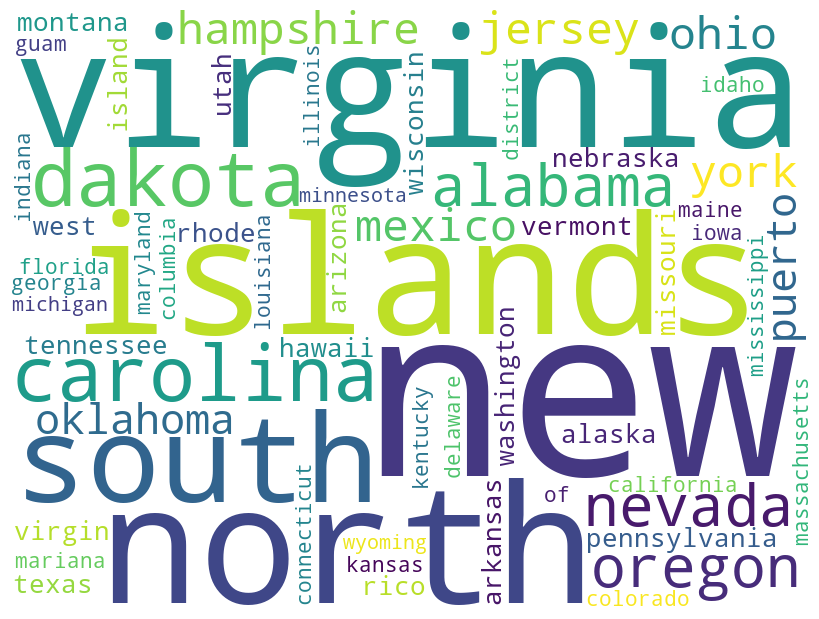

In [8]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 800, height=600, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

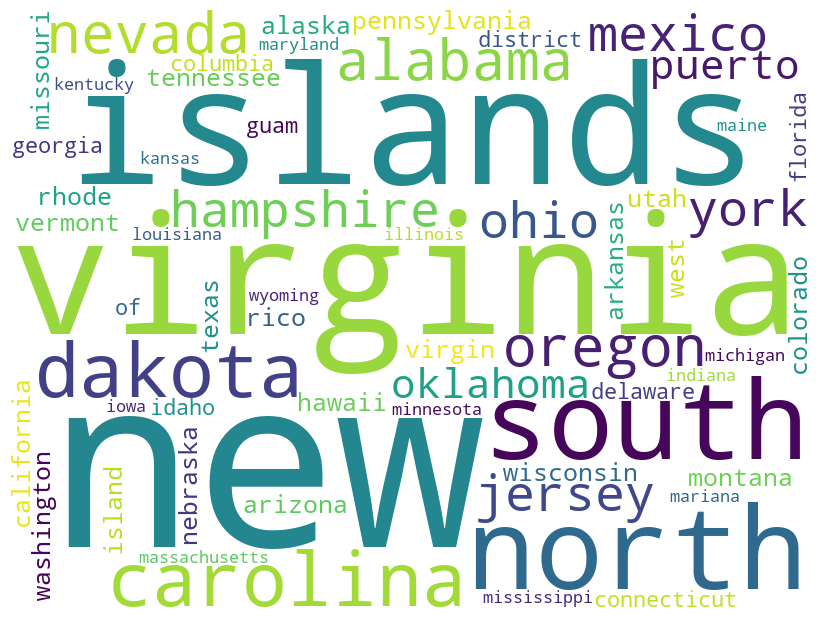

In [9]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 800, height=600, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# **"Calculating TF-IDF Scores"**

In [10]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
# count token
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

# **Calculating TF-IDF Values and Updating DataFrame**

In [11]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
new,1196,3254.362434
virginia,598,2041.683231
islands,598,2041.683231
north,598,2041.683231
south,598,2041.683231


# **Generating WordCloud Based on TF-IDF Values**

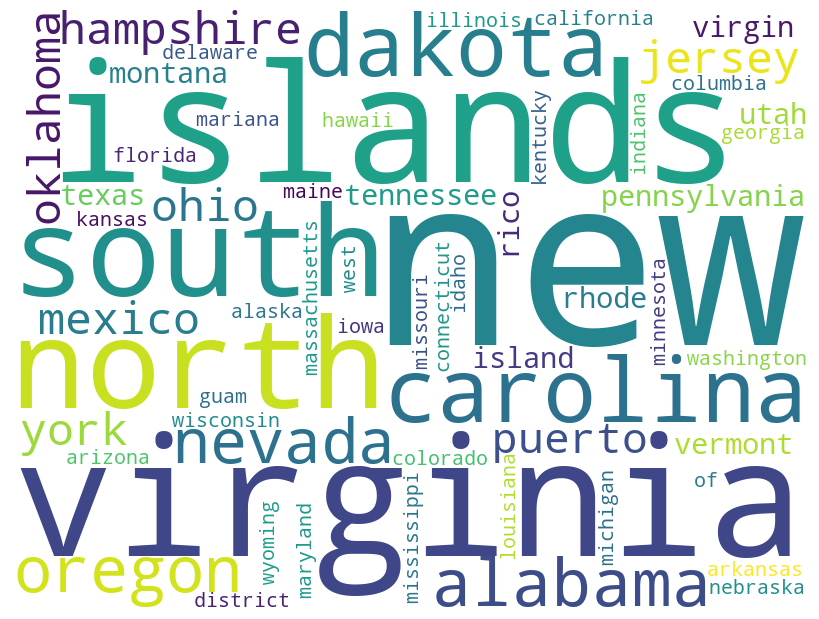

In [12]:
wc = WordCloud(background_color='white', width = 800, height=600,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# **"Counting Specific Keywords"**

In [13]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# **Count Keywords by Group in DataFrame**

In [14]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) 
# if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] 
# copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

# **Filtering DataFrame Rows by Month**



In [15]:
df= df[df['month']=='2023-09']
df.head(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,tokens,num_tokens
0,2023-09,Alabama,10342.0,145.0,15421.0,12848.0,1156.0,1052,0.0,14.0,...,0.0,29.0,21.0,14.0,0.0,1.0,0.0,44556,[alabama],1
1,2023-09,Alaska,188.0,10.0,2429.0,2543.0,262.0,197,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5922,[alaska],1
2,2023-09,Arizona,9113.0,2014.0,14398.0,8239.0,1575.0,931,0.0,14.0,...,0.0,6.0,6.0,0.0,1.0,0.0,0.0,38189,[arizona],1
3,2023-09,Arkansas,2139.0,181.0,5645.0,6108.0,437.0,466,6.0,8.0,...,0.0,6.0,13.0,2.0,0.0,0.0,0.0,17207,[arkansas],1
4,2023-09,California,28611.0,15559.0,33792.0,20548.0,4295.0,0,0.0,1.0,...,0.0,7289.0,3093.0,529.0,26.0,10.0,0.0,118625,[california],1
5,2023-09,Colorado,7012.0,19.0,16429.0,12217.0,1475.0,1872,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39320,[colorado],1
6,2023-09,Connecticut,6120.0,520.0,4723.0,1797.0,350.0,0,0.0,0.0,...,0.0,184.0,85.0,5.0,0.0,0.0,0.0,13784,[connecticut],1
7,2023-09,Delaware,177.0,0.0,1608.0,1039.0,76.0,91,0.0,0.0,...,0.0,40.0,11.0,0.0,0.0,0.0,0.0,3155,[delaware],1
8,2023-09,District of Columbia,674.0,0.0,202.0,15.0,0.0,4,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,929,"[district, of, columbia]",3
9,2023-09,Florida,8399.0,0.0,51223.0,20945.0,4528.0,3085,0.0,6.0,...,0.0,259.0,141.0,54.0,47.0,45.0,2.0,95281,[florida],1


# **"Visualizing Keyword Frequencies Over Time with a Heatmap in Python"**

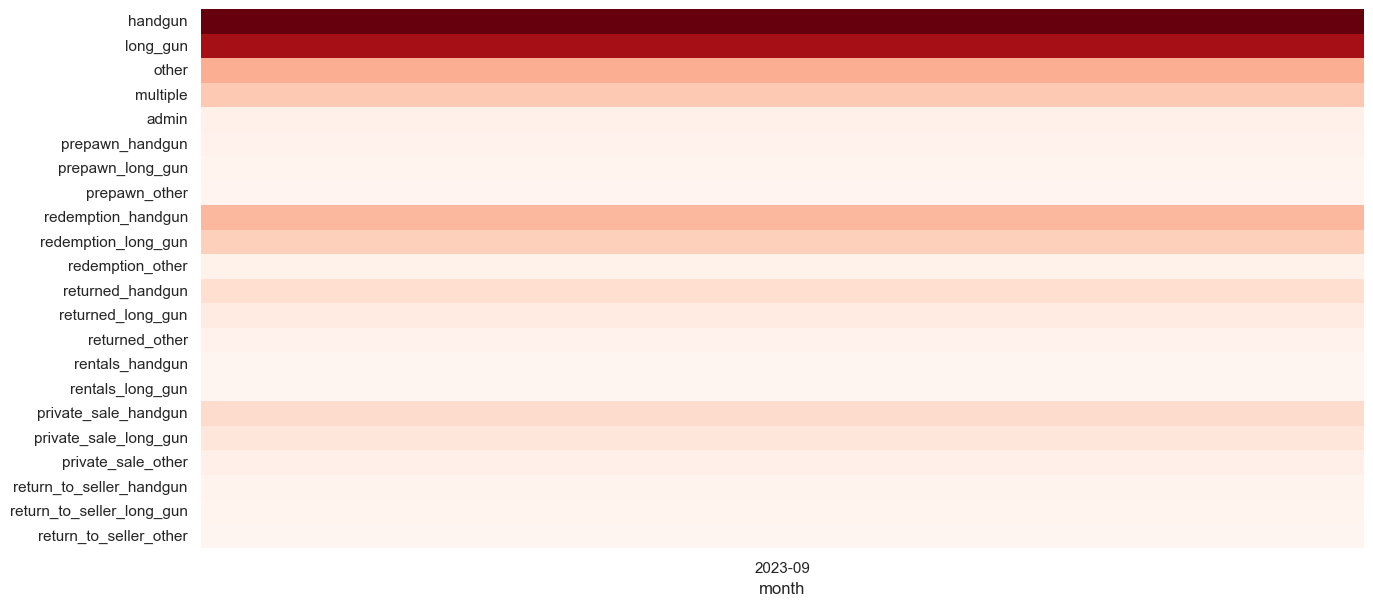

In [16]:
import seaborn as sns


keywords = ['handgun', 'long_gun', 'other', 'multiple', 'admin', 
            'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 
            'redemption_handgun', 'redemption_long_gun', 'redemption_other', 
            'returned_handgun', 'returned_long_gun', 'returned_other', 
            'rentals_handgun', 'rentals_long_gun', 
            'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 
            'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other']

# Compute keyword frequencies by month
freq_df = df.groupby('month')[keywords].sum()

# Compute relative frequencies based on totals per year
freq_df = freq_df.div(df.groupby('month')['totals'].sum(), axis=0)

# Apply square root as sublinear filter for better contrast
freq_df = np.sqrt(freq_df)

# Plot heatmap
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)
plt.show()

